<a href="https://colab.research.google.com/github/FabianaAndrade/ep_ciencia_de_dados/blob/main/exploracao_descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import importlib.util
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
spec = importlib.util.spec_from_file_location("utils", "/content/drive/MyDrive/ep_cd/utils.py")
utils = importlib.util.module_from_spec(spec)
spec.loader.exec_module(utils)

In [ ]:
caminho_arquivo = '/content/drive/MyDrive/ep_cd/data.csv'
df = pd.read_csv(caminho_arquivo, sep=';')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
df = df.rename(columns={'Daytime/evening attendance\t': 'Attendance'})
df = utils.colum_map(df)

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,Single,2nd phase - general contingent,5,Animation and Multimedia Design,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other—11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International student (bachelor),1,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education—12th Year of Schooling or ...,Higher Education—degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st phase - general contingent,5,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd phase - general contingent,2,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Estatística Descritiva

In [ ]:
total_dados = len(df)
print(f"Total de dados: {total_dados}")
total_amostra = int(0.1 * total_dados)
print(f"Total de amostra: {total_amostra}")
df_analise = df.sample(n=total_amostra, random_state=42)

Total de dados: 4424
Total de amostra: 442


**Entendendo os valores da variavel target**

 Nesse momento, é possivel perceber que as classificacoes são:
  - Dropout: abandonou a graduação
  - Graduate: concluiu a graduação
  - Enrolled: ainda está matriculado

  Dessa forma, considerando que o objetivo do estudo é classificar mais diretamente as pessoas que concluem ou abandonam a graduação, foi definido que iria descartar os registro de alunos que ainda estão matriculados.

In [ ]:
df_analise.groupby('Target').size()

,0
Target,
Dropout,147
Enrolled,82
Graduate,213


In [ ]:
df_analise = df_analise[df_analise['Target'] != 'Enrolled']

# Variaveis Categorias

Explorando as variaveis categoricas (17):

Marital status, Application mode, Course,
Daytime/evening attendance, Previous qualification,
Nacionality, Mother's qualification, Father's qualification
Mother's occupation, Father's occupation, Displaced,
Educational special needs, Debtor, Tuition fees up to date,
Gender, Scholarship holder, International, Target


Recuperando os valores da variavel target, é possivel perceber que o total de alunos que concluem a graduação é um pouco maior que os que não concluem

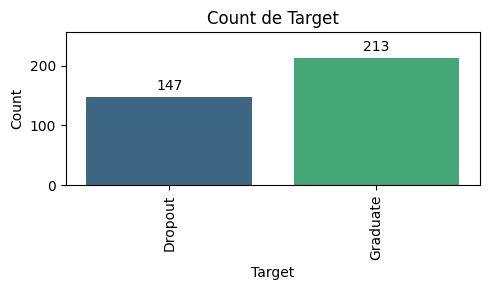

In [ ]:
utils.grafico_barras(df_analise, 'Target')

"Genero": a maioria dos alunos são homens e o dobro de mulheres

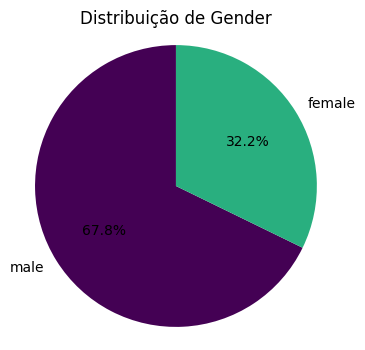

In [ ]:
utils.grafico_pizza(df_analise, 'Gender')

"Marital status": maioria são alunos com estado civil solteiro

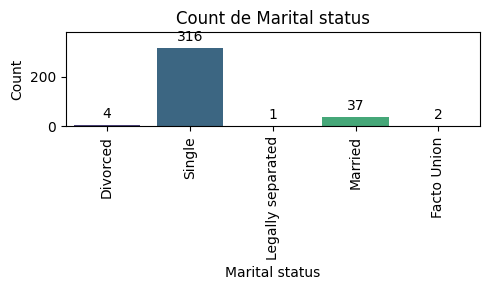

In [ ]:
utils.grafico_barras(df_analise, 'Marital status')

"Nacionality": É possivel oberservar a presença de estudantes internacionais, mas a maioria mesmo é de origem portuguesa

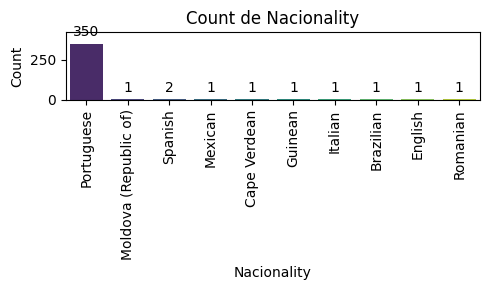

In [ ]:
utils.grafico_barras(df_analise, 'Nacionality')

International: conversando com o resultado da variavel nacionalidade, a maioria dos estudantes não são internacionais

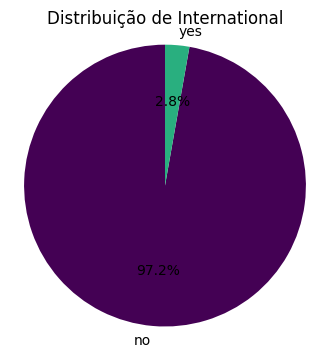

In [ ]:
utils.grafico_pizza(df_analise, 'International')

"Scholarship holder": é possivel perceber que a maioria dos alunos não possuem apoio estudantil, no entanto há um percentual consideravel de cerca de 20% dos alunos que possuem apoio

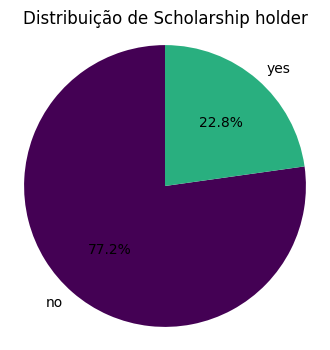

In [ ]:
utils.grafico_pizza(df_analise, 'Scholarship holder')

"Debtor": existe um percentual consideravel de alunos com dividas abertas, 11%. Essa variavel pode influenciar a conclusão do curso

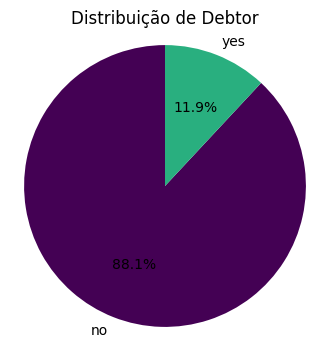

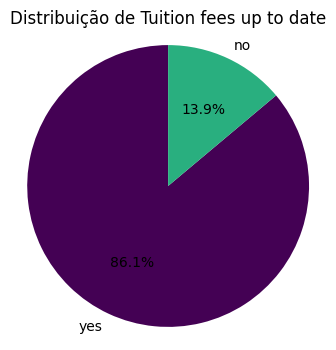

In [ ]:
utils.grafico_pizza(df_analise, 'Debtor')
print("\n")
utils.grafico_pizza(df_analise, 'Tuition fees up to date')

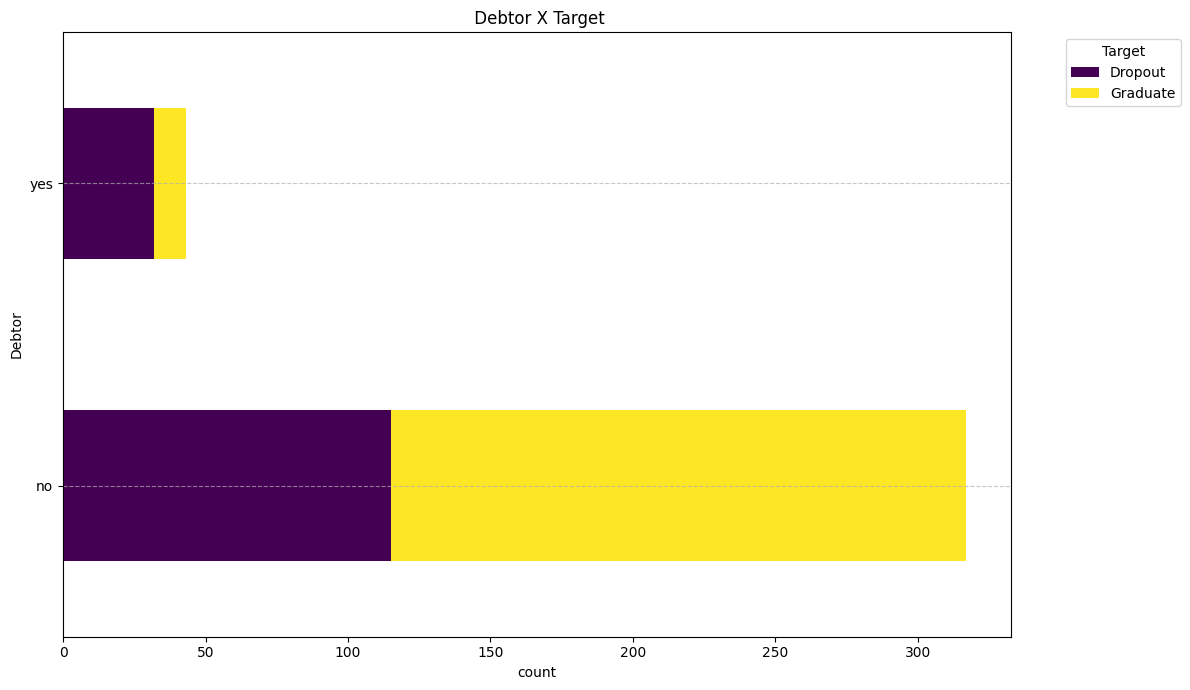

In [ ]:
utils.grafico_barras_proporcao(df_analise, 'Debtor', 'Target')

"Displaced": o Percentual de alunos deslocados (cidades externas) é consideravel

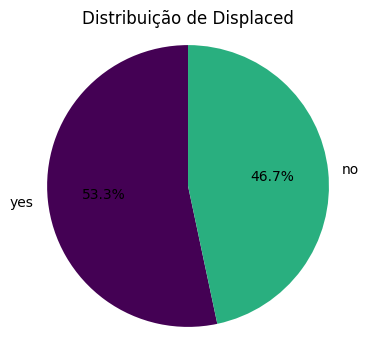

In [ ]:
utils.grafico_pizza(df_analise, 'Displaced')

"Educational special needs": variavel indica se o aluno precisa de acessibilidade durante as aulas, a minoria precisa. Esse indicador pode ser investigado para avaliar desempenho nesse grupo de alunos

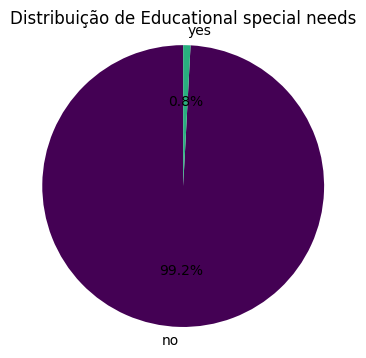

In [ ]:
utils.grafico_pizza(df_analise, 'Educational special needs')

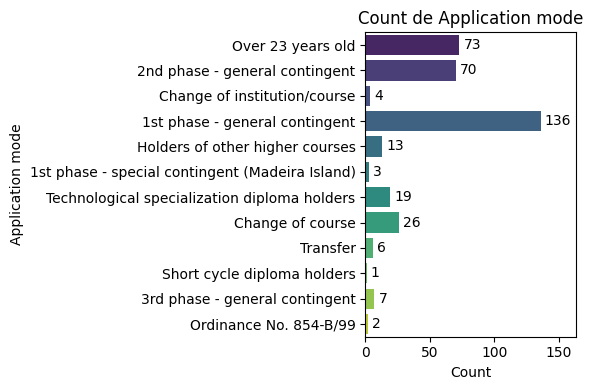

In [ ]:
utils.grafico_barras_horizontal(df_analise, 'Application mode')

"Course": Na variavel course é possivel ver que enfermagem é o com mais alunos e cursos relacionados a tecnologia possuem menor quantiade de alunos.

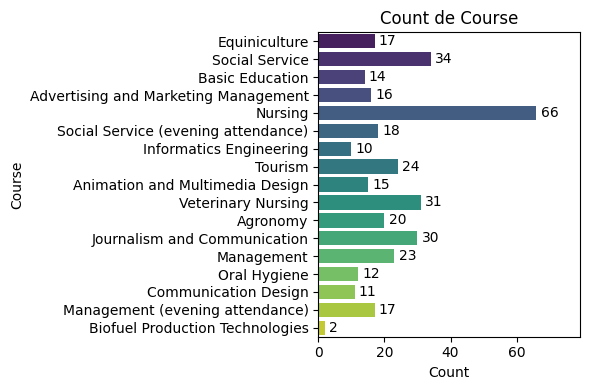

In [ ]:
utils.grafico_barras_horizontal(df_analise, 'Course')

"Turno x Curso"

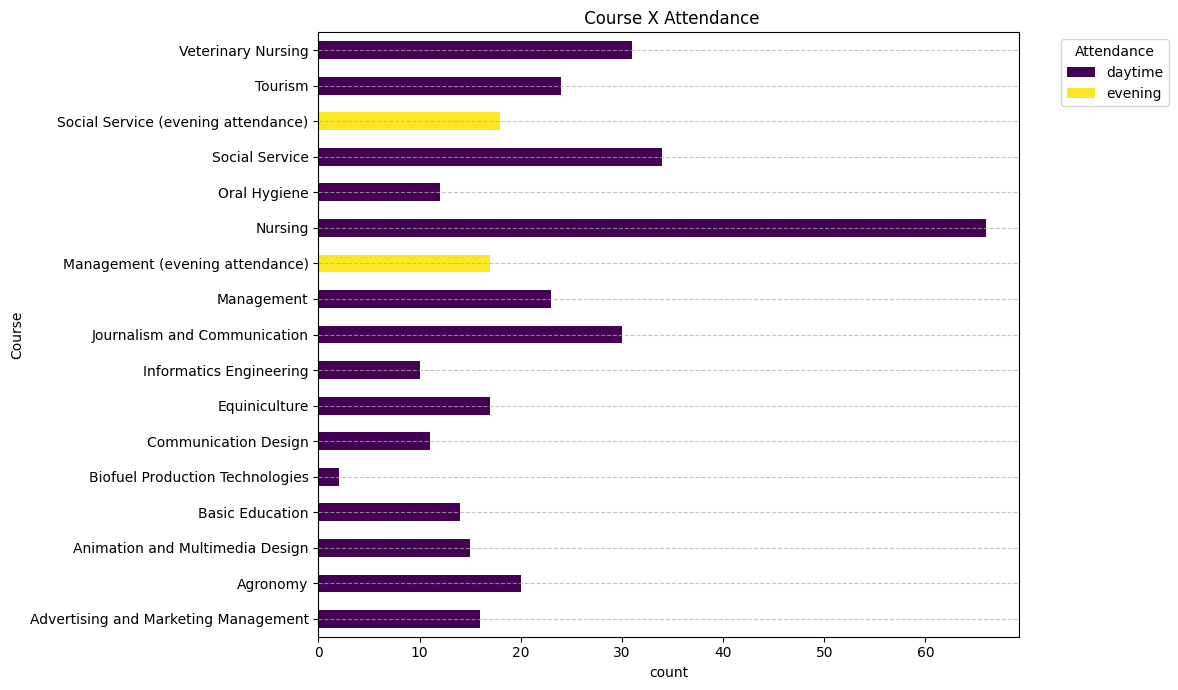

In [ ]:
utils.grafico_barras_proporcao(df_analise, 'Course', 'Attendance')

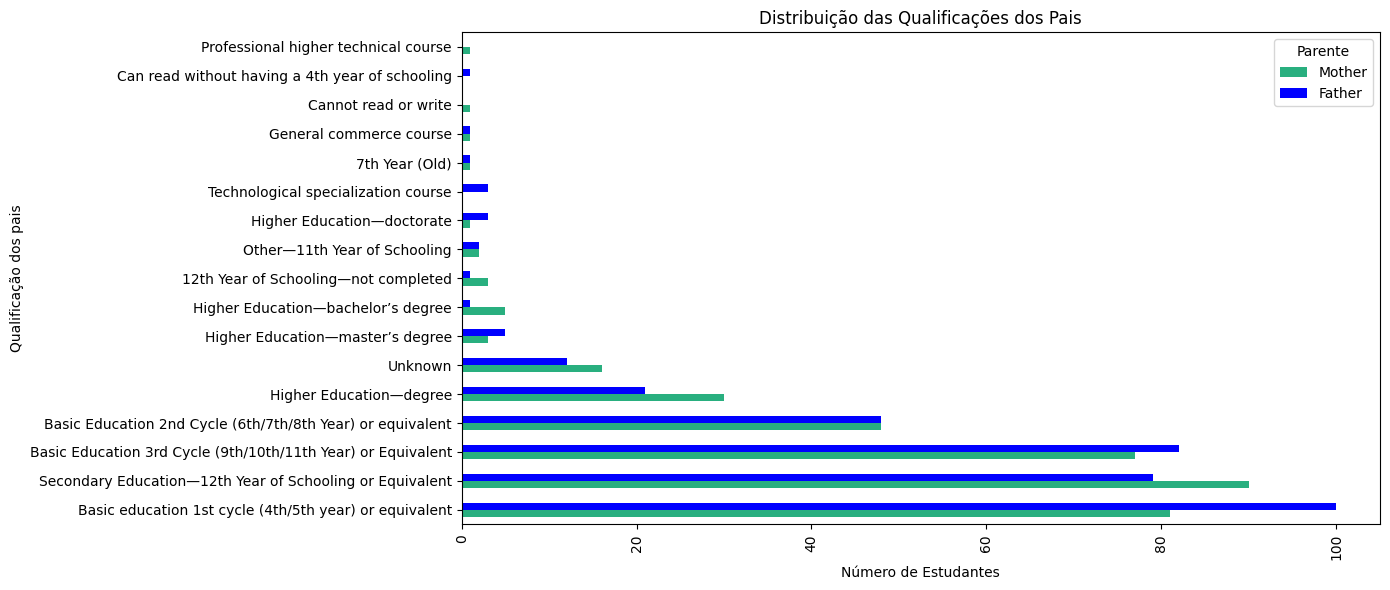

In [ ]:
mother_counts = df_analise["Mother's qualification"].value_counts()
father_counts = df_analise["Father's qualification"].value_counts()

qualifications_df = pd.DataFrame({
    "Mother": mother_counts,
    "Father": father_counts
}).fillna(0).astype(int)

qualifications_df = qualifications_df.loc[qualifications_df.sum(axis=1).sort_values(ascending=False).index]

qualifications_df.plot(kind='barh', figsize=(14, 6), color=['#29af7f', '#0000FF'])


plt.title("Distribuição das Qualificações dos Pais")
plt.xlabel("Número de Estudantes")
plt.ylabel("Qualificação dos pais")
plt.xticks(rotation=90)
plt.legend(title="Parente")
plt.tight_layout()
plt.show()

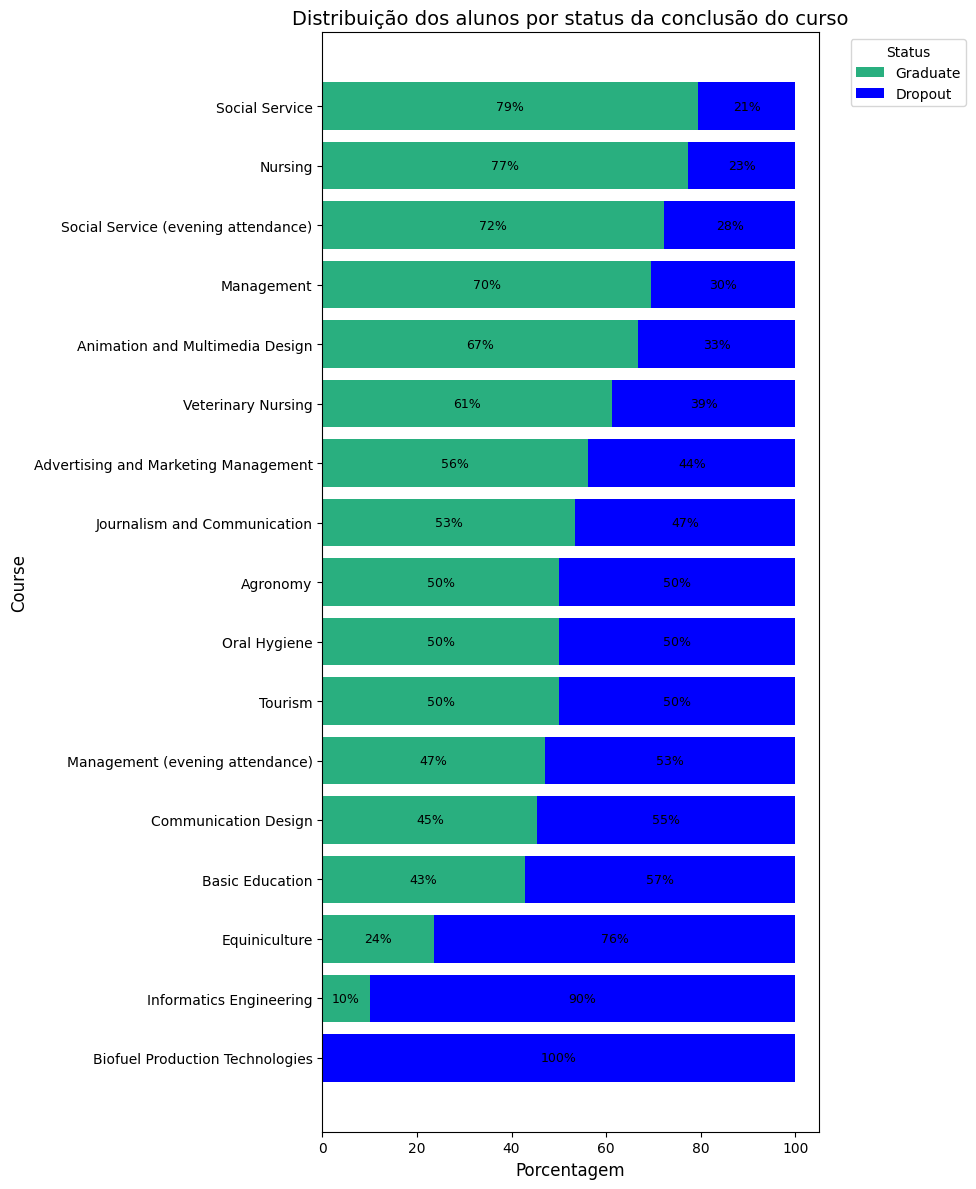

In [ ]:
utils.grafico_barras_target(df_analise, 'Course', 'Target')

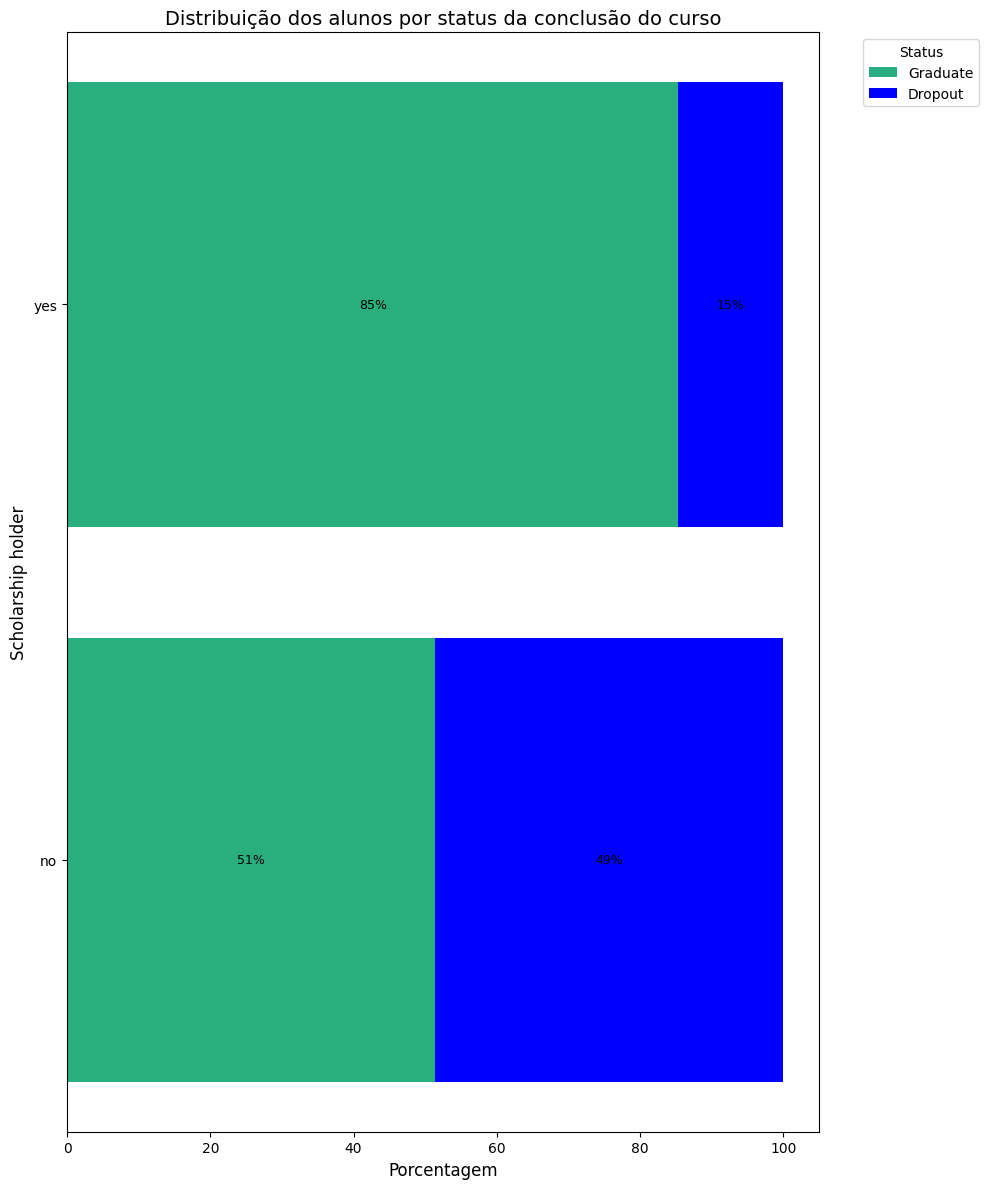

In [ ]:
utils.grafico_barras_target(df_analise, 'Scholarship holder', 'Target')

# Variaveis Numericas

Application order, Admission grade  , Age at enrollment, Curricular units 1st sem (credited)
Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations),
Curricular units 1st sem (approved), Curricular units 1st sem (grade),
Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited)
Curricular units 2nd sem (enrolled), Curricular units 2nd sem (evaluations),
Curricular units 2nd sem (approved),  Curricular units 2nd sem (grade),
Curricular units 2nd sem (without evaluations), Unemployment rate, Inflation rate,
GDP,

"Idade"

In [ ]:
df['Age at enrollment'].describe().round(2)

,Age at enrollment
count,4424.00
mean,23.27
std,7.59
min,17.00
25%,19.00
50%,20.00
75%,25.00
max,70.00


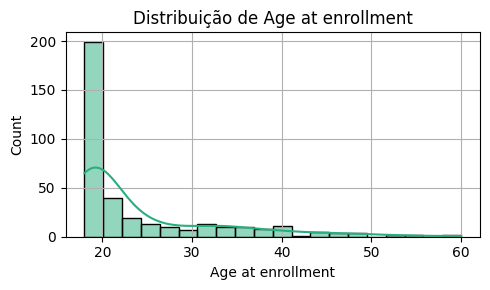

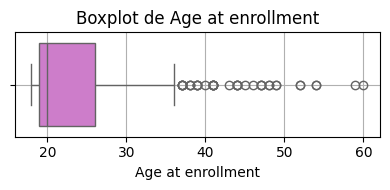

In [ ]:
utils.grafico_distribuicao(df_analise, 'Age at enrollment')
print("\n")
utils.grafico_boxplot(df_analise, 'Age at enrollment')

"Admission grade": a nota media de ingresso fica bem distribuida

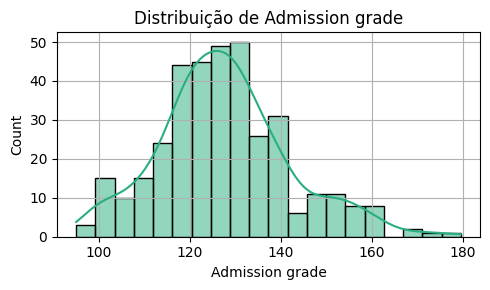

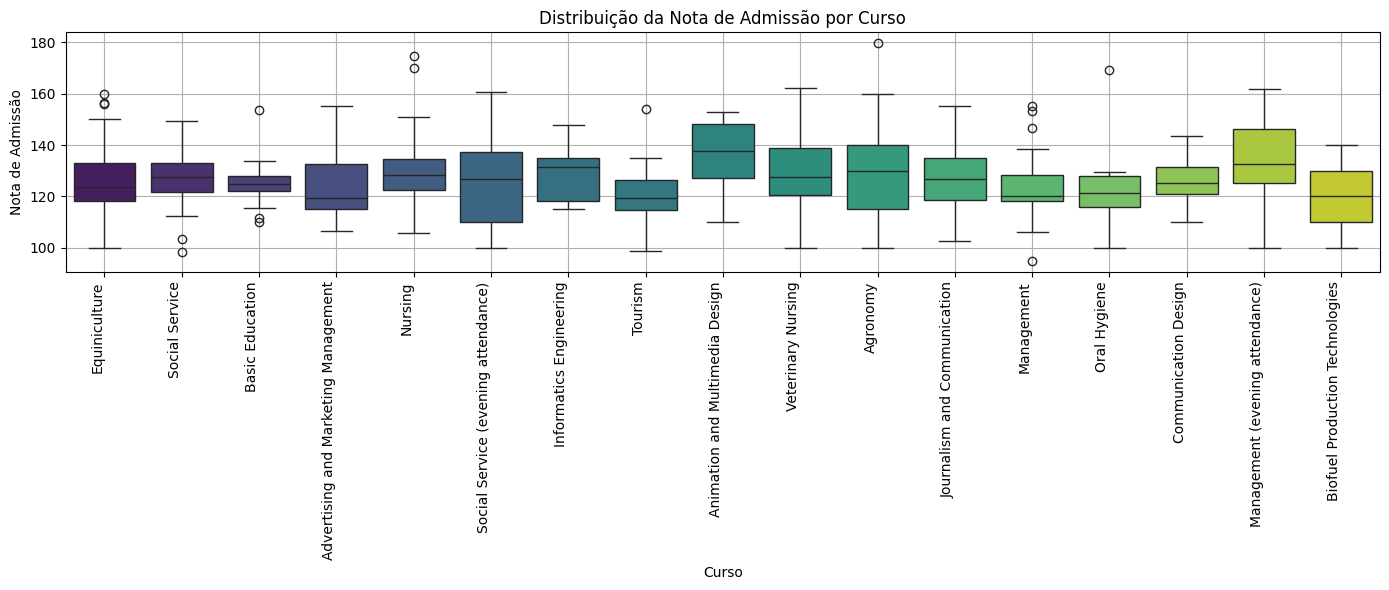

In [ ]:
utils.grafico_distribuicao(df_analise, 'Admission grade')
print("\n")
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_analise, x='Course', hue='Course', y='Admission grade', palette='viridis')
plt.xlabel('Curso')
plt.ylabel('Nota de Admissão')
plt.title('Distribuição da Nota de Admissão por Curso')
plt.xticks(rotation=90, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
variaveis = ['Unemployment rate', 'Inflation rate', 'GDP']
resumo = df[variaveis].describe().round(2)
print(resumo)

       Unemployment rate  Inflation rate      GDP
count            4424.00         4424.00  4424.00
mean               11.57            1.23     0.00
std                 2.66            1.38     2.27
min                 7.60           -0.80    -4.06
25%                 9.40            0.30    -1.70
50%                11.10            1.40     0.32
75%                13.90            2.60     1.79
max                16.20            3.70     3.51


In [ ]:
variaveis_desempenho = [
    "Curricular units 1st sem (credited)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 1st sem (approved)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)",
]
resumo = df[variaveis_desempenho].describe().round(1)
resumo

,Curricular units 1st sem (credited),Curricular units 2nd sem (credited),Curricular units 1st sem (enrolled),Curricular units 2nd sem (enrolled),Curricular units 1st sem (approved),Curricular units 2nd sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (grade)
count,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0
mean,0.7,0.5,6.3,6.2,4.7,4.4,10.6,10.2
std,2.4,1.9,2.5,2.2,3.1,3.0,4.8,5.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,5.0,5.0,3.0,2.0,11.0,10.8
50%,0.0,0.0,6.0,6.0,5.0,5.0,12.3,12.2
75%,0.0,0.0,7.0,7.0,6.0,6.0,13.4,13.3
max,20.0,19.0,26.0,23.0,26.0,20.0,18.9,18.6


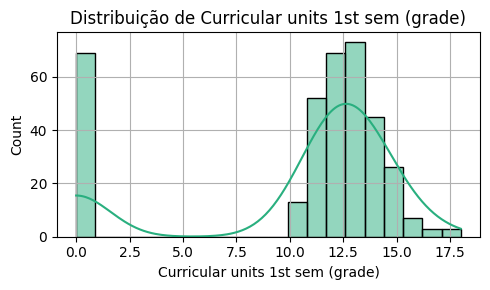

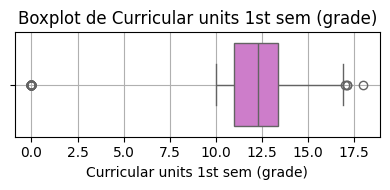

In [ ]:
utils.grafico_distribuicao(df_analise, 'Curricular units 1st sem (grade)')
print("\n")
utils.grafico_boxplot(df_analise, 'Curricular units 1st sem (grade)')

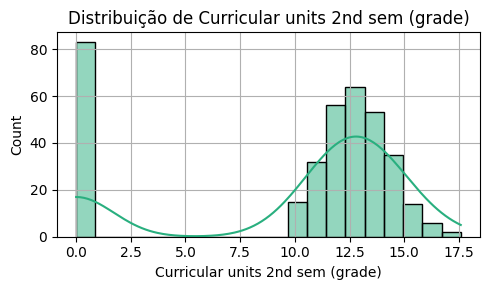

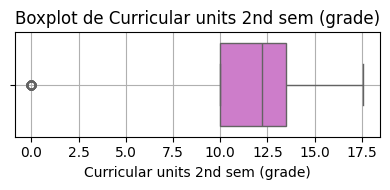

In [ ]:
utils.grafico_distribuicao(df_analise, 'Curricular units 2nd sem (grade)')
print("\n")
utils.grafico_boxplot(df_analise, 'Curricular units 2nd sem (grade)')